In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


In [3]:
# Convert raw data file for image of one letter to pandas dataframe
def bytes_to_DataFrame(infile):
    bytes_to_ints = []
    with open(infile, 'rb') as f:
        rawdata = f.read()

    # Each pixel is a triple of three bytes, R, G, B;
    # since the pixel is gray, R=G=B, so store the first value only
    for i in range(0, len(rawdata), 3):
        bytes_to_ints.append(int(rawdata[i]))
    return DataFrame(bytes_to_ints)

In [4]:
df = bytes_to_DataFrame("letter-1,1-smallSample-C-F-Whitened.raw")
df.shape

(2500, 1)

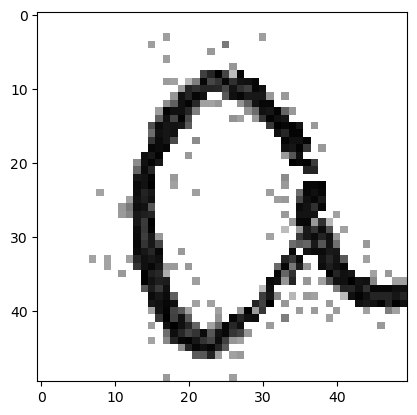

In [5]:
plt.figure()
plt.imshow(df.values.reshape(50, 50), cmap ='gray')

In [6]:
# Convert raw data file for image of one letter to numpy array
def bytes_to_NumpyArray(infile):
    bytes_to_ints = []
    with open(infile, 'rb') as f:
        rawdata = f.read()

    # Each pixel is a triple of three bytes, R, G, B;
    # since the pixel is gray, R=G=B, so store the first value only
    for i in range(0, len(rawdata), 3):
        bytes_to_ints.append(int(rawdata[i]))
    return np.array(bytes_to_ints)

In [7]:
ar = bytes_to_NumpyArray("letter-1,1-smallSample-C-F-Whitened.raw")
ar_rs = ar.reshape(50, 50)

# make a large center dot
ar_rs[24][24] = 0   # we can assign values to a numpy array
ar_rs[24][25] = 0
ar_rs[25][24] = 0
ar_rs[25][25] = 0


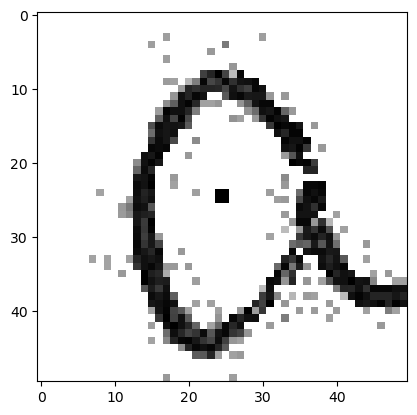

In [8]:
plt.figure()
plt.imshow(ar_rs, cmap ='gray')

In [9]:
def bytes_to_NumpyArray_noShrink(infile):
    '''Convert .raw file to np.array where each pixel is a single byte, not a triple'''
    ints_from_bytes = []
    with open(infile, 'rb') as f:
        rawdata = f.read()

    for i in range(len(rawdata)):
        ints_from_bytes.append(int(rawdata[i]))
    return np.array(ints_from_bytes)

In [10]:
np_ars = []
for offset_x in range(0, 901, 100):
    fname = "raw-letter-" + str(offset_x) + ",0.raw"
    np_ars.append(bytes_to_NumpyArray_noShrink(fname))
np_ars[5][0]

116

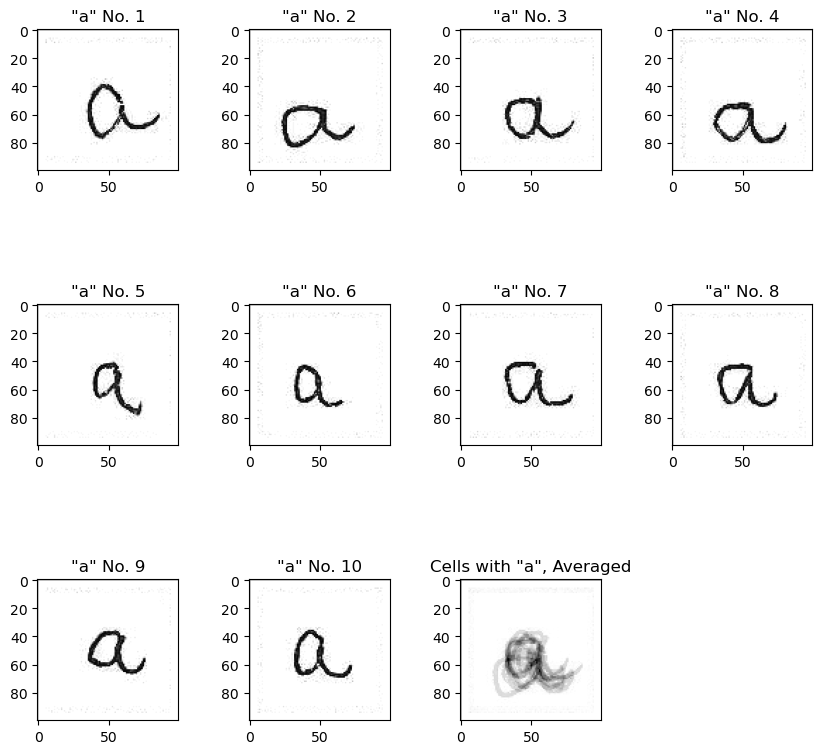

In [26]:
plt.figure(figsize=(10, 10))
ars_len = len(np_ars)

np_ars_avgs = []
for j in range(10000):
    np_ars_avgs.append(sum([np_ars[i][j] for i in range(len(np_ars))])/100)
for index in range(ars_len):
    plt.subplot(3, 4, index + 1)
    plt.imshow(np_ars[index].reshape(100, 100), cmap = "gray")
    plt.subplots_adjust(hspace=0.25, wspace=0.5)
    plt.title('"a" No. ' + str(index + 1))   
plt.subplot(3, 4, 11)
plt.imshow(np.array(np_ars_avgs).reshape(100, 100), cmap = "gray")
plt.title('Cells with "a", Averaged')
plt.show()

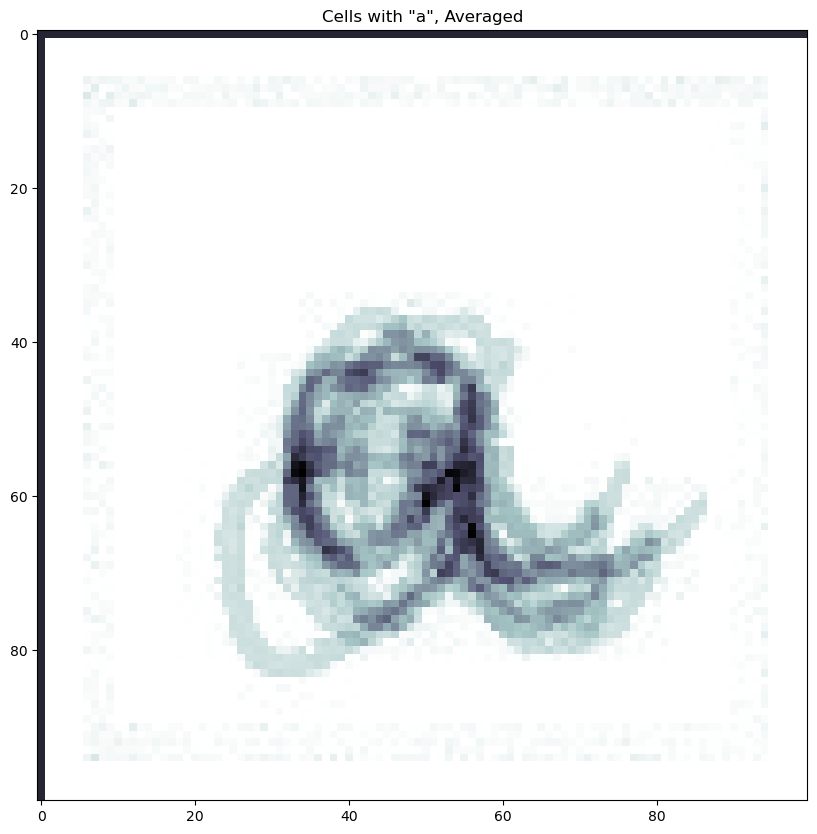

In [24]:
plt.figure(figsize=(10, 10))
plt.imshow(np.array(np_ars_avgs).reshape(100, 100), cmap = "bone")
plt.title('Cells with "a", Averaged')
plt.savefig("Cells-with-a-Averaged.png")
plt.show()